# <font color = Crimson size = 6> <b>Статистические гипотезы</b> </font>
___

<u>**Статистической**</u> называют гипотезу о законе распределения статистической совокупности либо о числовых параметрах известных распределений.

Выдвигаемую гипотезу называют **нулевой** и обозначают через $H_0$. Обычно это наиболее очевидная и правдоподобная гипотеза (хотя это вовсе не обязательно). И в противовес к ней рассматривают **альтернативную** или **конкурирующую** гипотезу $H_1$.

>Поскольку нулевая гипотеза выдвигается на основе анализа **выборочных** данных, то она может оказаться как правильной, так и неправильной. Более того, мы не сможем на 100% гарантировать её истинность либо ложность даже после статистической проверки. Ибо любая, самая «надёжная» выборка все равно остаётся выборкой и может нас дезинформировать (пусть с очень малой вероятностью).


___
## <font color = DarkGreen size = 5> <b>Проверки статистической гипотезы</b> </font>
___

Проверка осуществляется с помощью <u>**статистических критериев**</u> – это специальные случайные величины, которые принимают различные действительные значения.

>Для проверки нулевой гипотезы используют специально подобранную случайную величину, точное или приближенное распределение 
которой известно. Эту величину обозначают через \
$U$ или $Z$, если она распределена нормально, \
$F$ или $\upsilon^2$ — по закону Фишера-Снедекора, \
$T$ — по закону Стьюдента, \
$\chi^2$ — по закону «хи квадрат» и т.д.

В результате проверки нулевая гипотеза либо принимается, либо отвергается в пользу альтернативной.\
При этом есть риск допустить ошибки двух типов:
1) <u>**Ошибка первого рода**</u> состоит в том, что гипотеза $H_0$ будет отвергнута, хотя на самом деле она правильная. Вероятность допустить такую ошибку называют <u>**уровнем значимости**</u> и обозначают буквой $\alpha$.

2) <u>**Ошибка второго рода**</u> состоит в том, что гипотеза $H_0$ будет принята, но на самом деле она неправильная. Вероятность совершить эту ошибку обозначают буквой $\beta$. Значение $1-\beta$ называют <u>**мощностью критерия**</u> – это вероятность отвержения неправильной гипотезы.

Уровень значимости задаётся исследователем самостоятельно, наиболее часто выбирают значения $\alpha=0.1$, $\alpha=0.05$, $\alpha=0.01$.\
**При уменьшении вероятности** $\alpha$ – *отвергнуть правильную гипотезу* **растёт вероятность** $\beta$ – *принять неверную гипотезу* (при прочих равных условиях). Поэтому перед исследователем стоит задача грамотно подобрать соотношение вероятностей $\alpha$ и $\beta$, при этом учитывается **тяжесть последствий**, которые повлекут за собой та и другая ошибки.
<br><br>


**Процесс проверки статистической гипотезы состоит из следующих этапов:**
1) Обработка выборочных данных и выдвижение основной $H_0$ и конкурирующей $H_1$ гипотез.

2) Выбор статистического критерия $K$. Это непрерывная случайная величина, принимающая различные действительные значения.

3) Выбор уровня значимости $\alpha$.

4) Нахождение **критического значения** $k$ – это значение случайной величины $K$, которое зависит от выбранного уровня значимости $\alpha$ и опционально от других параметров. Критическое значение определяет **критическую область**. Она бывает левосторонней, правосторонней и двусторонней (красная штриховка).

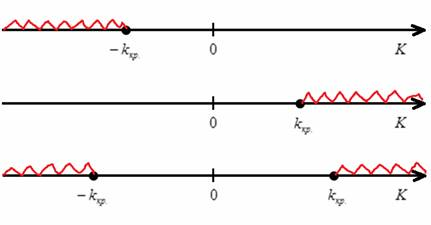

<u>**Критическая область**</u> – совокупность значений критерия, при которых нулевую гипотезу отвергают.

<u>**Область принятия гипотезы**</u> (область допустимых значений) – совокупность значений критерия, при которых гипотезу принимают.

5) Далее на основании выборочных данных рассчитывается **наблюдаемое значение критерия** $k$ и вывод:
* Если $k$ в критическую область НЕ попадает, то гипотеза $H_0$ на уровне значимости $\alpha$ принимается. Однако не нужно думать, что нулевая гипотеза доказана и является истиной, ведь существует вероятность $\beta$ – того, что совершена ошибка 2-го рода (приняли неверную гипотезу).

* Если $k$ попадает в критическую область, то гипотеза $H_0$ на уровне значимости $\alpha$ отвергается. При этом, если, например, $\alpha=0.05$, то в среднем в 5 случаях из 100 отвергается правильная гипотеза, т.е. совершается ошибка 1-го рода.

Основной принцип проверки статистических гипотез можно сформулировать так: если наблюдаемое значение критерия принадлежит критической области — гипотезу отвергают; если наблюдаемое значение критерия принадлежит области принятия гипотезы — гипотезу принимают.


___
## <font color = DarkGreen size = 5> <b>Гипотеза о генеральной средней нормального распределения</b> </font>
___

Предполагается, что генеральная средняя $a$ нормального распределения равна некоторому значению $a_0$: \
$H_0: a = a_0$

Для проверки гипотезы на уровне значимости $\alpha$ проводится выборка объема $n$ и рассчитывается выборочная средняя $\bar{x}$.

Исходя из полученного значения и специфики той или иной задачи, можно сформулировать следующие конкурирующие гипотезы: \
$H_1: a < a_0 \\
H_1: a > a_0 \\
H_1: a \not= a_0 \\
H_1: a = a_1 \text{, где } a_1 \text{ – конкретное альтернативное значение генеральной средней.}$

___
### <font color = MediumBlue size = 4> <b>С использованием табличных значений</b> </font>

___
#### <font color = SteelBlue size = 3> <b>Если генеральная дисперсия $\sigma^2$ известна</b> </font>

В качестве *статистического критерия* $K$ рассматривают случайную величину: \
$\displaystyle Z = \frac{(\bar{x}-a_0)\sqrt{n}}{\sigma}$, где \
$\bar{x}$ – случайное значение *выборочной средней*.

Далее находим критическую область. \
Для конкурирующих гипотез $H_1: a < a_0$ и $H_1: a = a_1$ (если $a_1 < a_0$) строится *левосторонняя область*. \
Для гипотез $H_1: a > a_0$ и $H_1: a = a_1$ (если $a_1 > a_0$) – *правосторонняя*. \
Для гипотезы $H_1: a \not= a_0$  – *двусторонняя* (т. к. конкурирующее значение генеральной средней может оказаться как больше, так и меньше $a_0$).

Чтобы найти критическую область нужно отыскать *критическое значение* $z_к$. Оно определяется из соотношения: \
$\displaystyle \Phi(z_к) = \frac{1-2\alpha}{2}$ – для односторонней области \
$\displaystyle \Phi(z_к) = \frac{1-\alpha}{2}$ – для двусторонней области \
$\alpha$ – выбранный уровень значимости \
$\Phi(z)$ – функция Лапласа

На основании выборочных данных рассчитываем наблюдаемое значение критерия:
$\displaystyle z_н = \frac{(\bar{x}-a_0)\sqrt{n}}{\sigma}$

**Результаты:**
1) Для левосторонней критической области. Если $z_н > -z_к$, то гипотеза $H_0$ на уровне значимости $\alpha$ принимается. Если $z_н < -z_к$, то отвергается.

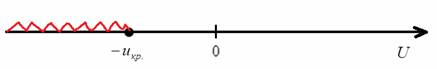

2) Правосторонняя критическая область. Если $z_н < z_к$, то гипотеза $H_0$ принимается, в случае $z_н > z_к$ – отвергается.

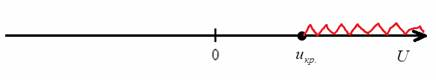

3) Двусторонняя критическая область. Если $|z_н| < z_к$, то гипотеза $H_0$ принимается, в противном случае – отвергается.

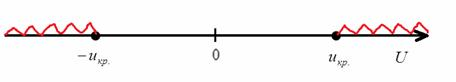

##### <font color = SlateBlue size = 3> Пример </font>

Из нормальной генеральной совокупности с известной дисперсией $\sigma^2=3.2$ извлечена выборка объёма $n=25$ и по ней найдена выборочная средняя $\bar{x}=19.3$. Требуется на уровне значимости $0.01$ проверить нулевую гипотезу $H_0: a = 20$ против конкурирующей гипотезы $H_1: a = 19$.

$\displaystyle U = \frac{(\bar{x}-a_0)\sqrt{n}}{\sigma}$

Т.к. $a_1 < a_0$, то критическая область левосоторонняя. Тогда критическое значение: \
$\displaystyle \Phi(u_к) = \frac{1-2\alpha}{2} = 0.49 \\
u_к = 2.33 \\
\displaystyle u_н = \frac{(\bar{x}-a_0)\sqrt{n}}{\sigma} = -1.96$

Если $u_н > -u_к$, то гипотеза $H_0$ на уровне значимости $\alpha$ принимается. \
Т.к. $-1.96 > -2.33$, то гипотеза $H_0: a = 20$ на уровне значимости $0.01$ принимается.

In [8]:
from math import sqrt
from scipy.stats import norm

d = 3.2
n = 25
x = 19.3
alpha = 0.01
a0 = 20
a1 = 19

phi = (1-2*alpha)/2
print(f'Phi(u_к) = {phi}')
uk = norm.ppf(phi+0.5)
print(f'Uk = {uk:.2f}')

un = ((x-a0)*sqrt(n))/sqrt(d)
print(f'Un = {un:.2f}')

print(f'H0: a = 20 is {un>-uk}')

Phi(u_к) = 0.49
Uk = 2.33
Un = -1.96
H0: a = 20 is True


___
#### <font color = SteelBlue size = 3> <b>Если генеральная дисперсия $\sigma^2$ неизвестна</b> </font>

В этом случае остаётся ориентироваться на несмещенную выборочную дисперсию $S^2$ и критерий \
$\displaystyle T = \frac{(\bar{x}-a_0)\sqrt{n}}{S}$, где \
$\bar{x}$ – случайное значение *выборочной средней*, \
$S$ - несмещенное стандартное отклонение.

Данная случайная величина имеет **распределение Стьюдента** с $k=n-1$ степенями свободы.

Алгоритм решения полностью сохраняется.

In [58]:
from scipy.stats import t

# Чтобы получить значение Tk (критерий Стьюдента)

alpha = 0.05
k = 6

# Right-Tailed Test
#scipy.stats.t.ppf(1 - alpha, k)
print(t.ppf(1 - alpha, k))

# Left-Tailed Test
#scipy.stats.t.ppf(alpha, k)
print(t.ppf(alpha, k))

# Two-Tailed Test
#scipy.stats.t.ppf(1 - alpha/2, k)
print(t.ppf(1 - alpha/2, k))

1.9431802803927816
-1.9431802803927818
2.4469118487916806


___
### <font color = MediumBlue size = 4> <b>Идея статистического вывода, p-уровень значимости</b> </font>

Предположим что верна нулевая гипотеза $H_0$. Тогда мы знаем, что если многократно будем повторять один и тот же эксперимент, то получится, что средние значения всех исследуемых выборок распределятся согласно нормальному распределению и будут иметь среднее значение равное математическому ожиданию генеральной совокупности $a = a_0$ \
со стандартной ошибкой среднего $\displaystyle se = \frac{\sigma}{\sqrt{n}}$, где \
$\sigma$ – стандартное отклонение генеральной совокупности, \
$n$ – количество элементов в выборке.

Узнаем насколько сильно отклонилось наше выборочное среднее $\bar{x}$ от математического ожидания генеральной совокупности в единицах стандартного отклонения. Для этого сделаем Z-преобразование: \
$\displaystyle z = \frac{\bar{x}-a_0}{se}$

Далее находим вероятность такого или еще более сильно выраженного отклонения от среднего значения генеральной совокупности $P(a_0 < \bar{x} - z\cdot se \cup a_0 > \bar{x} + z\cdot se) = 1 - 2\Phi(z)$ – **уровень значимости**.

><u>**p-value**</u> – это вероятность получить такие или более выраженные различия при условии, что в генеральной совокупности никаких различий на самом деле нет.

**Результаты:**
1) Если уровень значимости $P < \alpha$, то гипотезу $H_0$ следует отклонить.

2) Если уровень значимости $P > \alpha$, то гипотезу $H_0$ следует принять.

In [13]:
d = 3.2
n = 25
x = 19.3
alpha = 0.01
a0 = 20
a1 = 19

se = sqrt(d/n)
#print(f'se = {se}')
z = (x - a0)/se
#print(f'Z = {z}')

p = 1-2*(-0.5 + norm.cdf(abs(z)))
print(f'P-value = {p}')

print(f'H0: a = 20 is {p>alpha}')

P-value = 0.05039928287148254
H0: a = 20 is True


##### <font color = SlateBlue size = 3> Пример </font>

В среднем слушатели курса по введению в статистику набирают 115 баллов, однако, в 2015 году средний балл  случайно выбранных 144 участников составил 118 со стандартным отклонением равным 9. Рассчитайте p уровень значимости для проверки нулевой гипотезы о том, что среднее значение баллов в 2015 году равняется 115.

In [15]:
a0, n, a1, sd = 115, 144, 118, 9
alpha = 0.05

se = sd / sqrt(n)
print(f'{se = }')
z = (a1 - a0)/se
print(f'{z = }')

p = 1-(-0.5 + norm.cdf(abs(z)))*2
print(f'P-value = {p}')
print(f'H0: a = 115 is {p>alpha}')

se = 0.75
z = 4.0
P-value = 6.334248366623996e-05
H0: a = 115 is False


##### <font color = SlateBlue size = 3> Пример </font>

Если на выборке в 15 наблюдений при помощи одновыборочного t-теста проверяется нулевая гипотеза: $\mu=10$ и рассчитанное t-значение равняется -2 (t = -2), то p-уровень значимости (двусторонний) равен:

In [67]:
n, a0, Tn = 15, 10, -2

# two-sided p-value
print(t.sf(abs(Tn),n-1)*2)
print((1-t.cdf(abs(Tn),n-1))*2)


0.06528795288911197
0.06528795288911193


___
## <font color = DarkGreen size = 5> <b>Гипотеза о генеральной дисперсии нормального распределения</b> </font>

Пусть генеральная совокупность распределена нормально, причем генеральная дисперсия хотя и неизвестна, но имеются основания предполагать, что она равна гипотетическому (предполагаемому) значению $\sigma_0^2$. На практике $\sigma_0^2$ устанавливается на основании предшествующего опыта или теоретически. 

Пусть из генеральной совокупности извлечена выборка объема $n$ и по ней найдена несмещенная выборочная дисперсия $S^2$ c $k = 
= n - 1$ степенями свободы. Требуется по несмещенной дисперсии при заданном уровне значимости проверить нулевую гипотезу, состоящую в том, что генеральная дисперсия рассматриваемой совокупности равна гипотетическому значению $\sigma_0^2$.\
Учитывая, что $S^2$ является несмещенной оценкой генеральной дисперсии, нулевую гипотезу можно записать так: \
$H_0: M(S^2) = \sigma_0^2$

**Требуется установить, значимо или незначимо различаются исправленная выборочная и гипотетическая генеральная дисперсии.**

Для проверки этой гипотезы используют критерий \
$\displaystyle \chi^2 = \frac{(n-1)S^2}{\sigma_0^2}$, где \
$S^2$ – случайное значение несмещенной дисперсии.

Данная случайная величина имеет **распределение хи-квадрат** с количеством степеней свободы $k=n-1$ и принимает лишь неотрицательные значения.

1) Для гипотезы $H_1: \sigma^2 < \sigma_0^2$ строится левосторонняя область, критическое значение равно $\chi_к^2 = \chi_к^2(1-\alpha,k)$

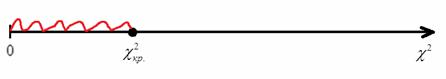

2) Для гипотезы $H_1: \sigma^2 > \sigma_0^2$ строится правосторонняя область, критическое значение равно $\chi_к^2 = \chi_к^2(\alpha,k)$

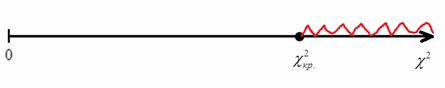

3) Для гипотезы $H_1: \sigma^2 \not= \sigma_0^2$ строится двусторонняя область, левая и правая критические точки определяются по формулам \
$\chi_{к.лев.}^2 = \chi_к^2(1-\displaystyle \frac{\alpha}{2},k) \\
\chi_{к.пр.}^2 = \chi_к^2(\displaystyle \frac{\alpha}{2},k)$

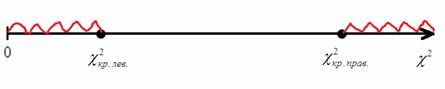

Если наблюдаемое значение критерия $\displaystyle \chi_н^2 = \frac{(n-1)S^2}{\sigma_0^2}$ попадает в критическую область, то гипотеза $H_0: M(S^2) = \sigma_0^2$ на уровне значимости $\alpha$ отвергается.

In [34]:
from scipy.stats import chi2

alpha = 0.05
p = 1 - alpha
k = 9

# Нахождение критической точки распределения
chi = chi2.isf(alpha, k)
print(f'{chi = }')
    # или
chi = chi2.ppf(p, k)
print(f'{chi = }')

# Нахождение уровня значимости
alpha = 1 - chi2.cdf(chi, k)
print(f'{alpha = :.2f}')

# левосторонняя область
chi_left = chi2.isf(1-alpha, k)
print(f'{chi_left = }')

# правосторонняя область
chi_right = chi2.isf(alpha, k)
print(f'{chi_right = }')

# двусторонняя область
chi_left = chi2.isf(1-alpha/2, k)
chi_right = chi2.isf(alpha/2, k)
print(f'{chi_left = }\n{chi_right = }')

chi = 16.91897760462045
chi = 16.918977604620448
alpha = 0.05
chi_left = 3.3251128430668158
chi_right = 16.918977604620448
chi_left = 2.7003894999803584
chi_right = 19.02276779864163


___
## <font color = DarkGreen size = 5> <b>Гипотеза о вероятности события</b> </font>

Пусть в достаточно большом количестве $n$ независимых испытаний некоторое случайное событие появилось $m$ раз, и есть основание полагать, что вероятность $p$ появления этого события (в каждом испытании) равна некоторому значению $p_0$. \
Значимо или незначимо отличается относительная частота $\displaystyle \omega = \frac{m}{n}$ от этого гипотетического значения?

Для проверки гипотезы $H_0: p = p_0$ используют критерий \
$\displaystyle Z = \frac{\left(\displaystyle \frac{m}{n} - p_0 \right) \sqrt{n}}{\sqrt{p_0 q_0}}$, где \
$q_0=1-p_0$, \
$m$ – случайное количество испытаний, в которых событие появилось. \
При этом для качественного результата должно выполняться неравенство $n p_0 q_0 > \approx 10$.

Для конкурирующей гипотезы $H_1: p < p_0$ строится левосторонняя критическая область. \
Для конкурирующей гипотезы $H_1: p > p_0$ строится правосторонняя критическая область. \
Для конкурирующей гипотезы $H_1: p \not= p_0$ строится двусторонняя критическая область.
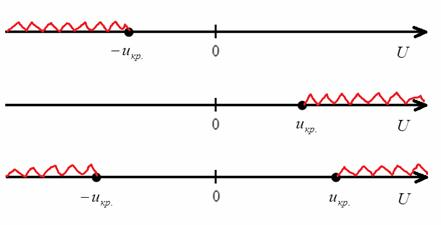

Критическое значение отыскивается из соотношения: \
$\displaystyle \Phi(z_к) = \frac{1-2\alpha}{2}$ для односторонней области и \
$\displaystyle \Phi(z_к) = \frac{1-\alpha}{2}$ для двусторонней области, где \
$\alpha$ – выбранный уровень значимости, $\Phi(z)$ – функция Лапласа.

Если наблюдаемое значение критерия $z_н$ попадает в критическую область, то гипотеза $H_0: p=p_0$ отвергается.

##### <font color = SlateBlue size = 3> Пример </font>

В результате длительных наблюдений установлено, что вероятность полного выздоровления больного, принимавшего лекарство $A$, равна 0.8. Новое лекарство $B$ назначено 800 больным, причём 660 из них полностью выздоровели. Можно ли считать новое лекарство значимо эффективнее лекарства $A$ на пятипроцентном уровне значимости?

В результате использования нового лекарство получена относительная частота полного выздоровления $\displaystyle \omega = \frac{m}{n} = \frac{660}{800} = 0.825$.\
На уровне значимости $\alpha = 0.05$ проверим гипотезу $H_0: p = p_0 = 0.8$ о том, что новое лекарство имеет такую же эффективность против конкурирующей гипотезы $H_1: p > 0.8$, что оно более эффективно.

Используем критерий 
$\displaystyle Z = \frac{\left(\displaystyle \frac{m}{n} - p_0 \right) \sqrt{n}}{\sqrt{p_0 q_0}}$, где \
$m$ – случайное количество пациентов из $n=800$, которые полностью выздоровеют.

Критическое значение правосторонней критической области найдём из соотношения \
$\displaystyle \Phi(z_к) = \frac{1-2\alpha}{2} = \frac{1 - 2 \cdot 0.05}{2} = 0.45$

In [4]:
from math import sqrt
from scipy.stats import norm

p, n, m, alpha = 0.8, 800, 660, 0.05
w = m/n

phi = (1-2*alpha)/2
print(f'Phi(Zk) = {phi}')
Zk = norm.ppf(phi+0.5)
print(f'{Zk = :.2f}')

Zn = round((m/n-p)*sqrt(n))/sqrt(p*(1-p),2)
print(f'{Zn = :.2f}')

print(f'H0: p = 0.8 is {Zn<abs(Zk)}')

Phi(Zk) = 0.45
Zk = 1.64
Zn = 1.77
H0: p = 0.8 is False


На уровне значимости 0,05 гипотезу $H_0: p = 0.8$ отвергаем в пользу конкурирующей гипотезы $H_1: p > 0.8$. Таким образом, выборочный результат $\omega = 0.825$ вряд ли объясним случайностью. \
**Ответ**: на пятипроцентном уровне значимости новое лекарство $B$ эффективнее лекарства $A$.